### Importing Packages and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [2]:
data = pd.read_csv("./concrete_data.csv")

In [3]:
data.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
726,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,3,14.31
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.20
944,153.1,145.0,113.0,178.5,8.0,1001.9,688.7,28,25.56
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3,21.78


In [4]:
data.shape

(1030, 9)

In [5]:
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Train Test Split

In [7]:
X = data.drop(columns=['Strength'])
y = data['Strength']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training, Testing and Evaluation (Without Transformation)

In [9]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [10]:
np.mean(cross_val_score(lr, X, y, cv=5, scoring='r2'))

np.float64(0.46099404916628683)

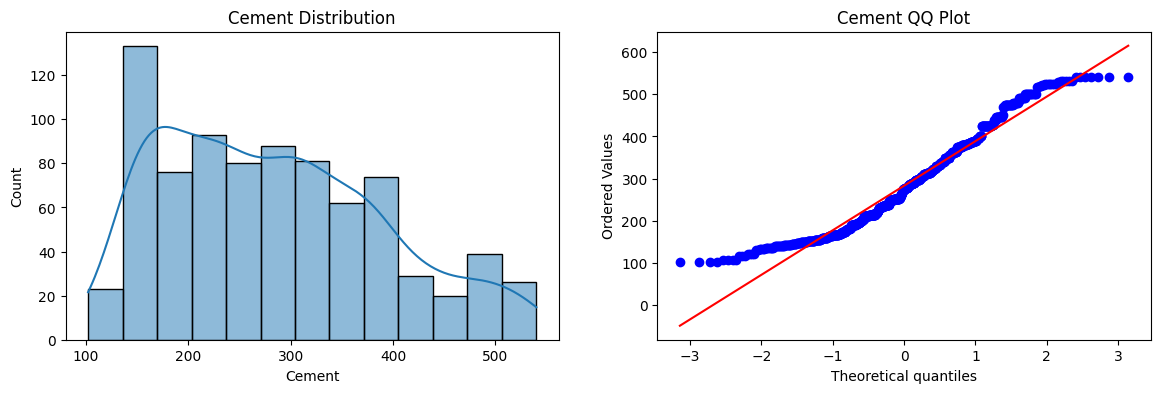

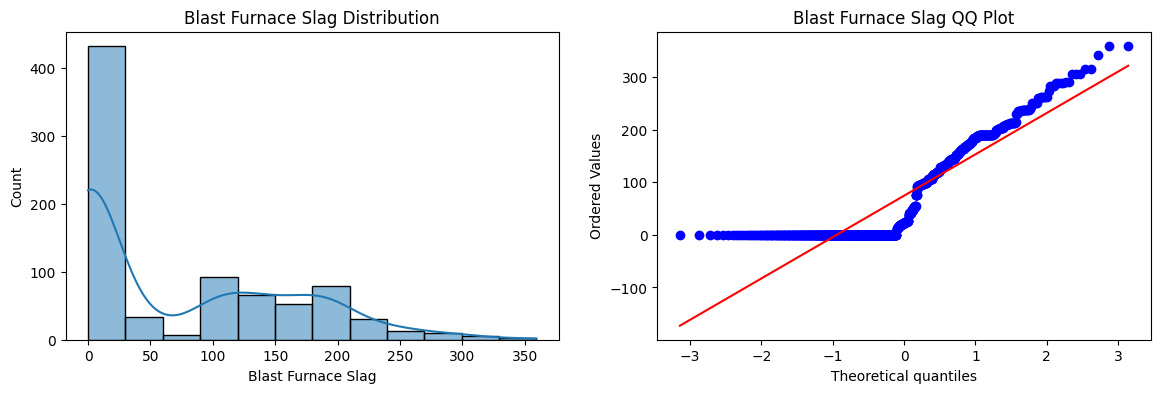

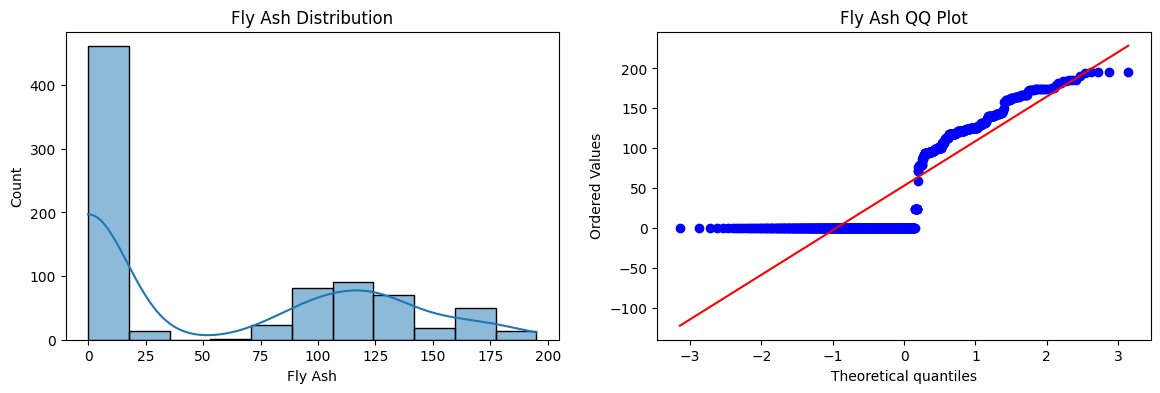

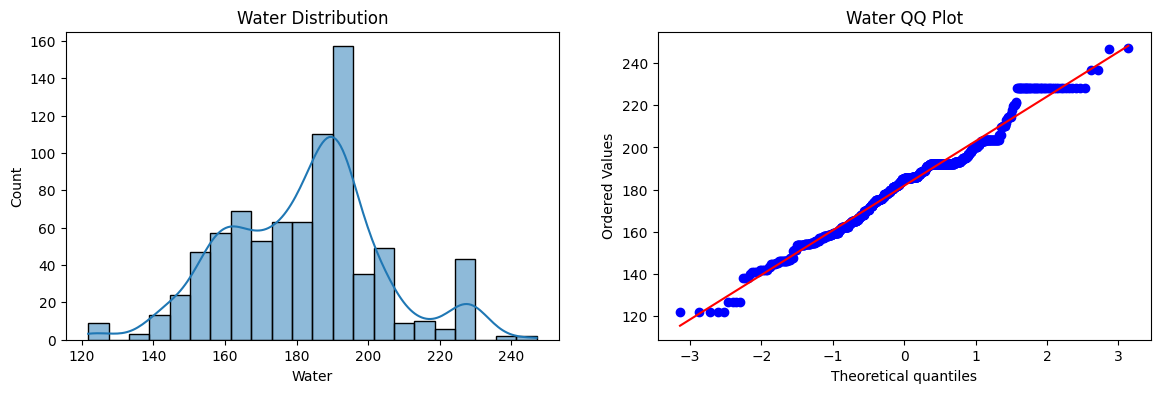

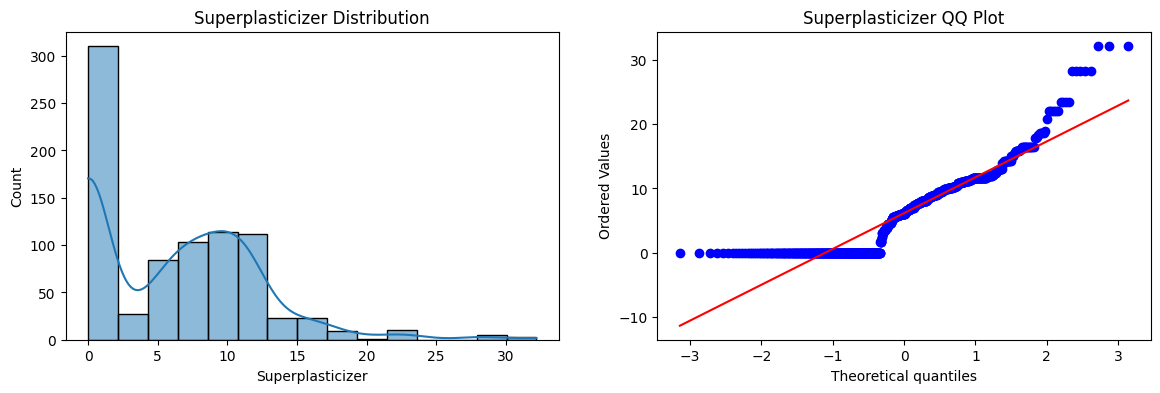

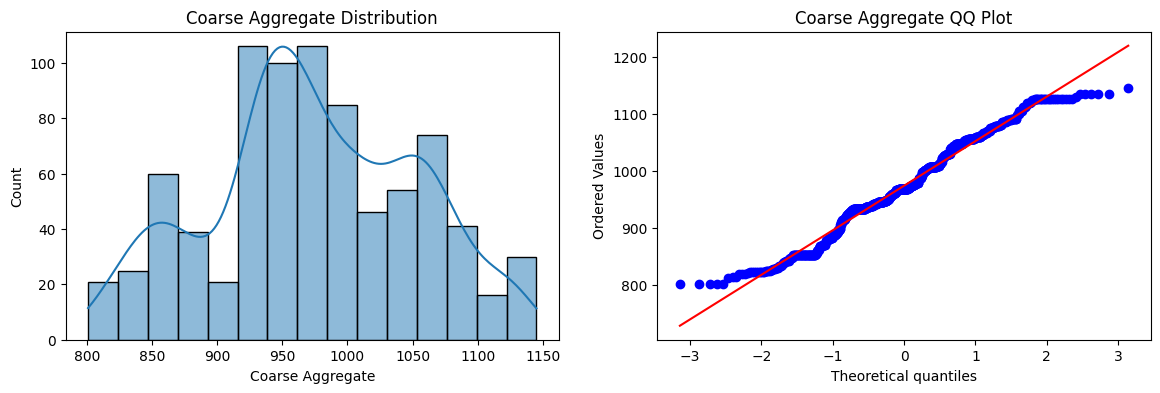

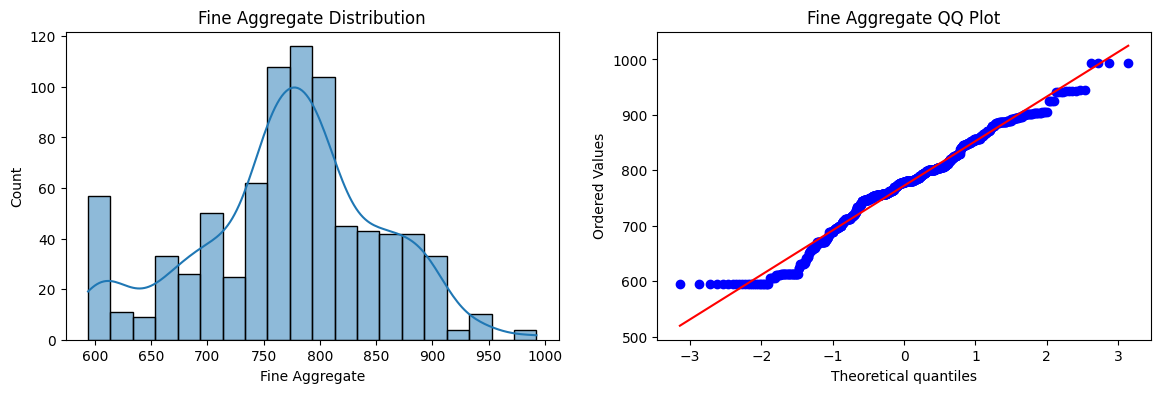

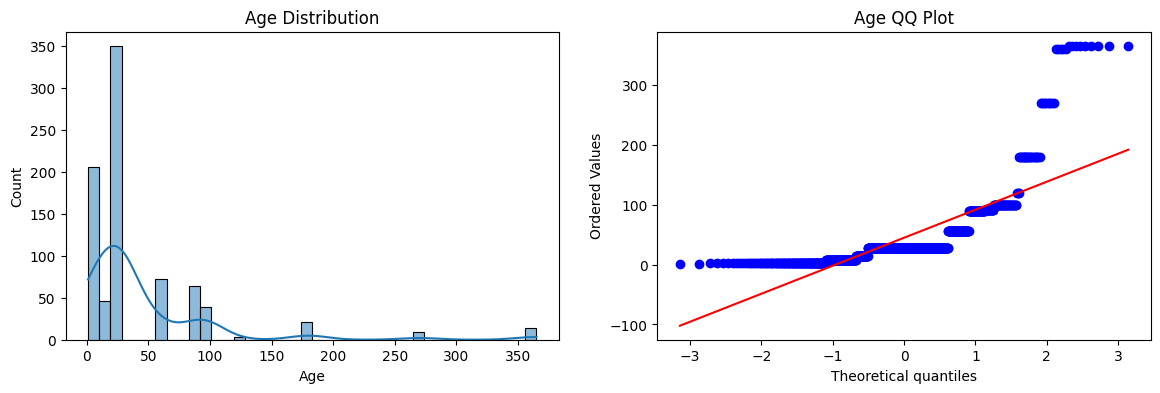

In [11]:
for column in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[column], kde=True)
    plt.title(f"{column} Distribution")

    plt.subplot(1,2,2)
    stats.probplot(X_train[column], dist="norm",plot=plt)
    plt.title(f"{column} QQ Plot")

    plt.show()

### Model Training, Testing and Evaluation (With Transformation - Box Cox)

In [13]:
pt1 = PowerTransformer(method='box-cox')

X_train_transformed = pt1.fit_transform(X_train+1e-6)
X_test_transformed = pt1.transform(X_test+1e-6)

pd.DataFrame({"cols":X_train.columns, "box_cox_lambda": pt1.lambdas_})

,cols,box_cox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [14]:
lr2 = LinearRegression()

lr2.fit(X_train_transformed, y_train)

y_pred2 = lr2.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8047825013722173

In [15]:
pt1 = PowerTransformer(method="box-cox")
X_transformed = pt1.fit_transform(X+1e-6)

np.mean(cross_val_score(lr2, X_transformed, y, scoring='r2'))

np.float64(0.6662950317141857)

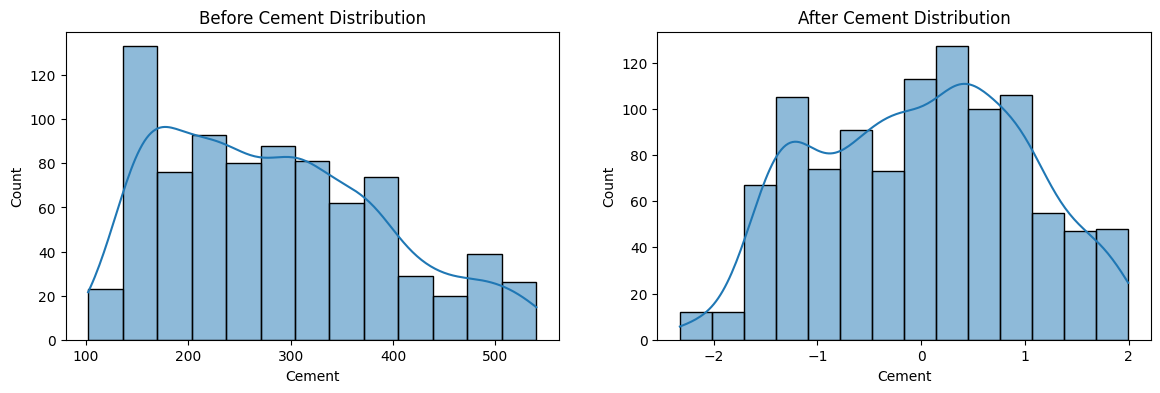

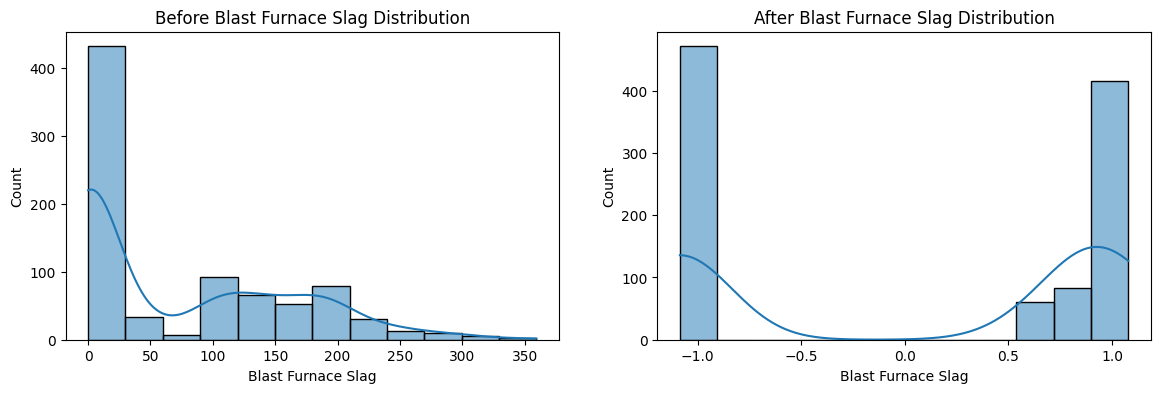

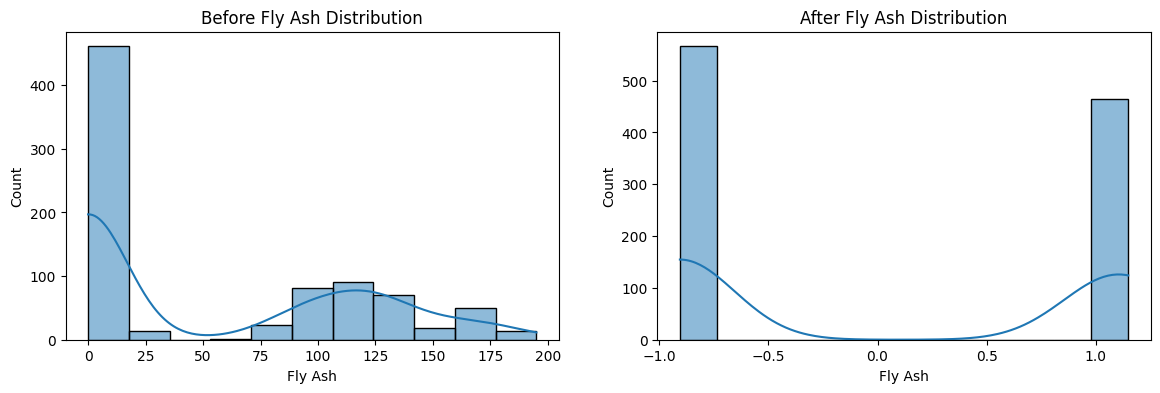

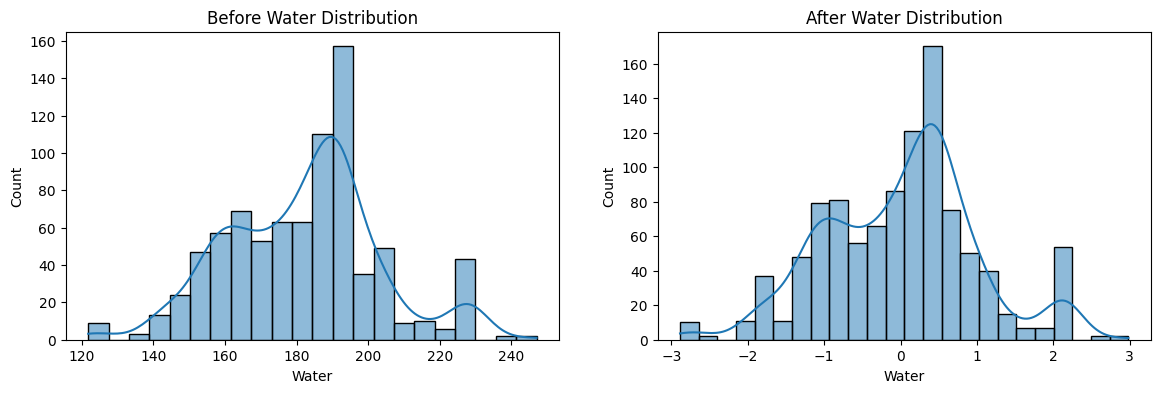

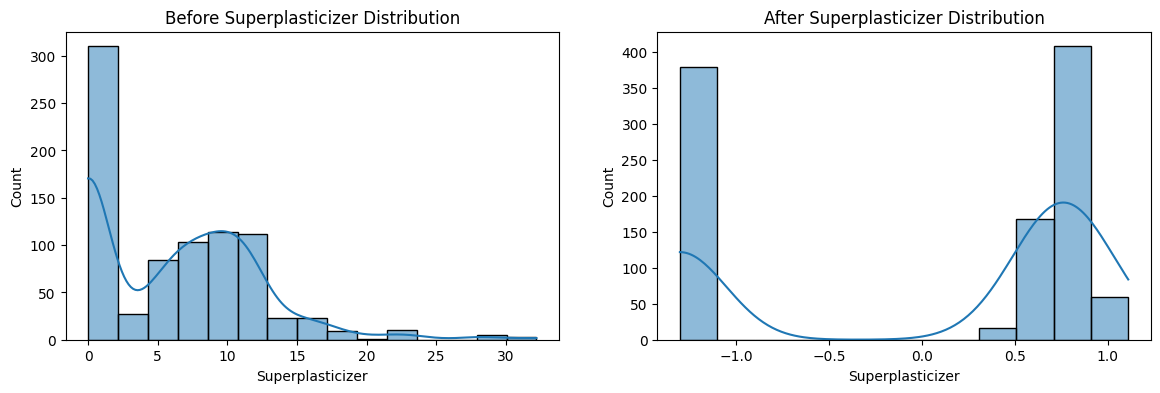

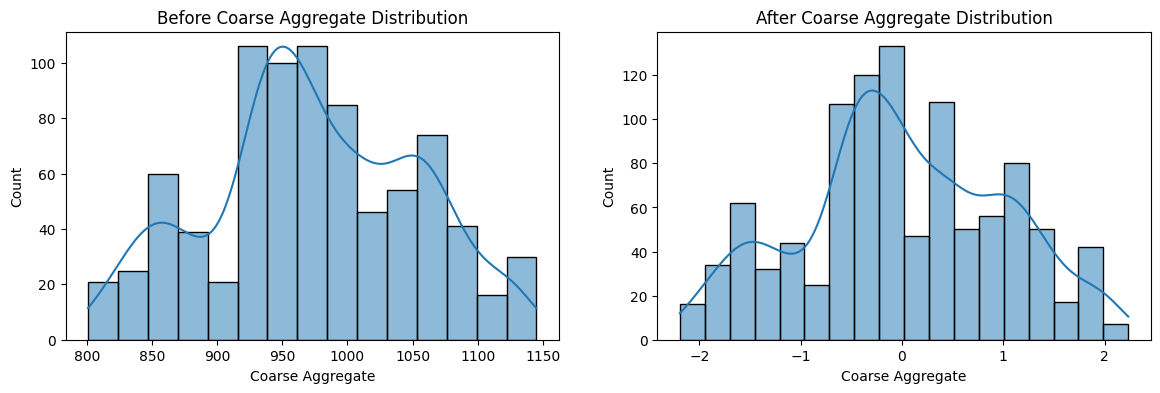

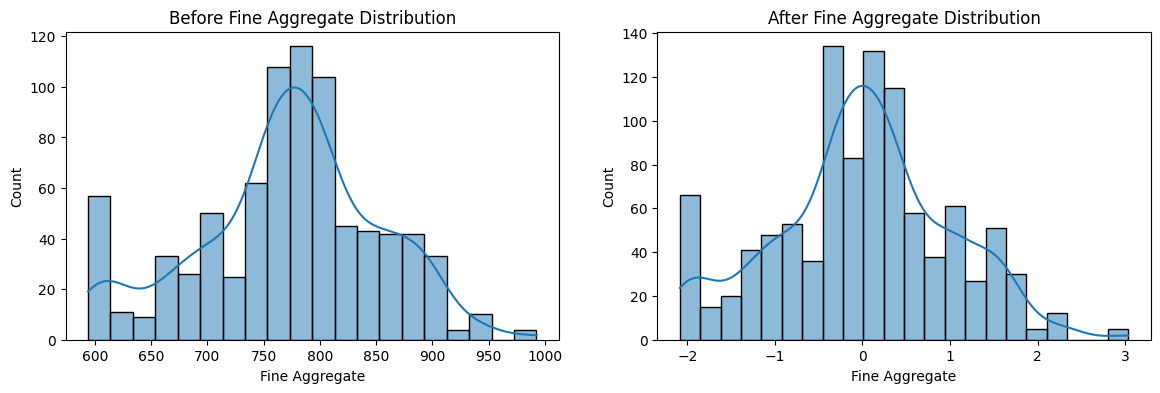

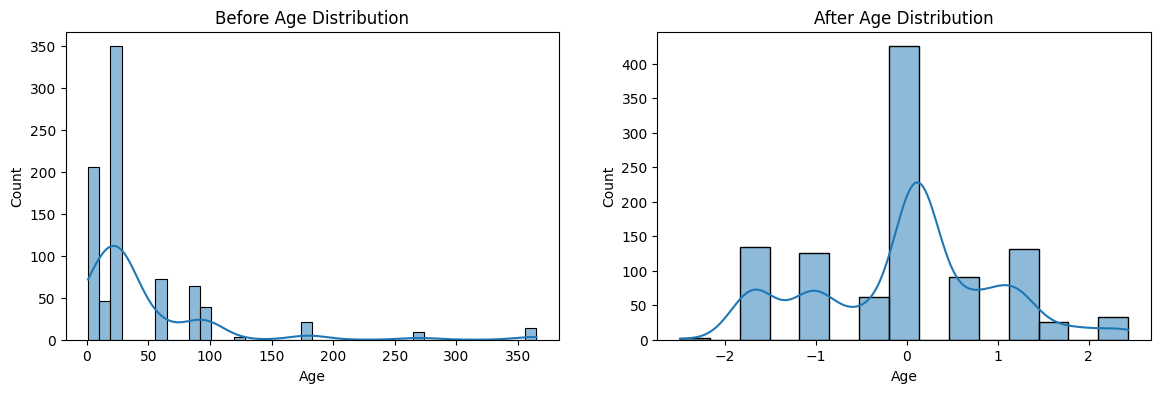

In [16]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

for column in X_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[column], kde=True)
    plt.title(f"Before {column} Distribution")

    plt.subplot(1,2,2)
    sns.histplot(X_transformed[column], kde=True)
    plt.title(f"After {column} Distribution")

    plt.show()

### Model Training, Testing and Evolution (With Transformation - Yeo Johnson)

In [17]:
pt2 = PowerTransformer()

X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

pd.DataFrame({"cols":X_train.columns, "yeo_johnson_lambda": pt2.lambdas_})

,cols,yeo_johnson_lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [18]:
lr3 = LinearRegression()
lr3.fit(X_train_transformed2, y_train)

y_pred3 = lr3.predict(X_test_transformed2)
r2_score(y_test, y_pred3)

0.8161906513339307

In [19]:
pt2 = PowerTransformer()
X_transformed2 = pt2.fit_transform(X)

np.mean(cross_val_score(lr3, X_transformed2, y, scoring='r2'))

np.float64(0.6834625134285742)

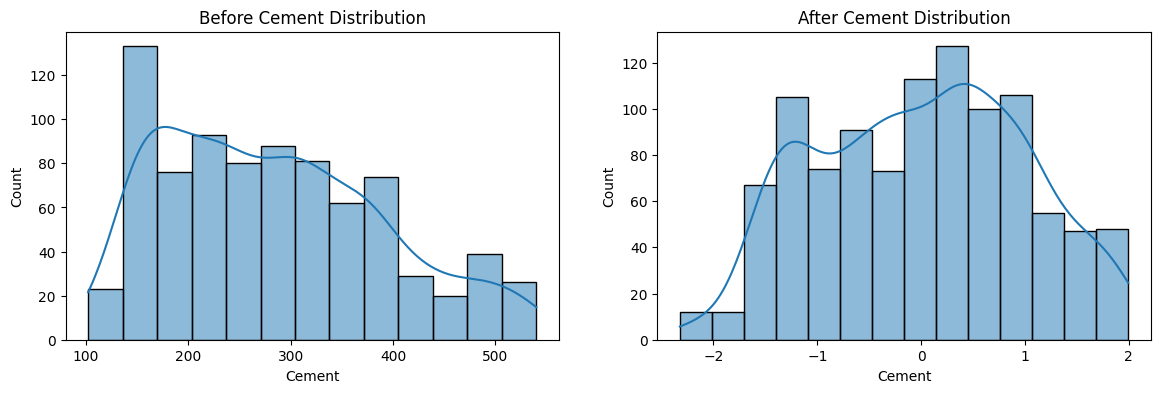

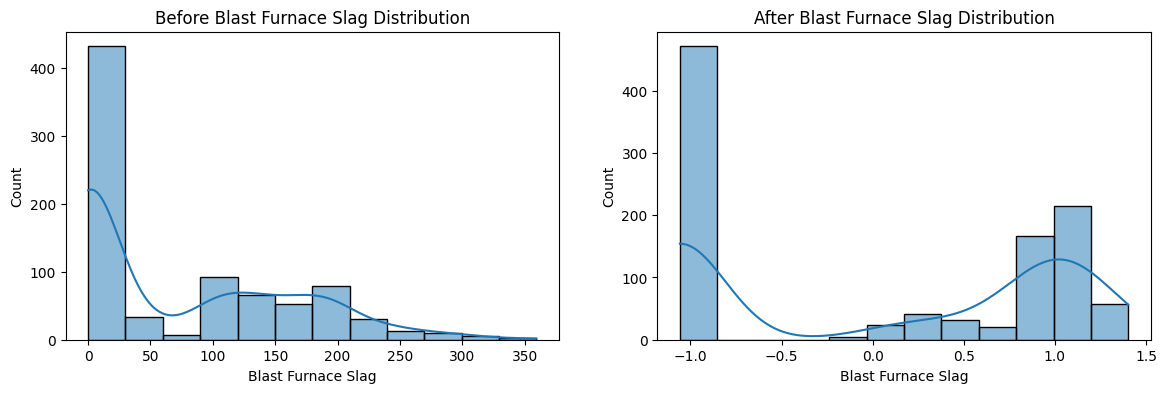

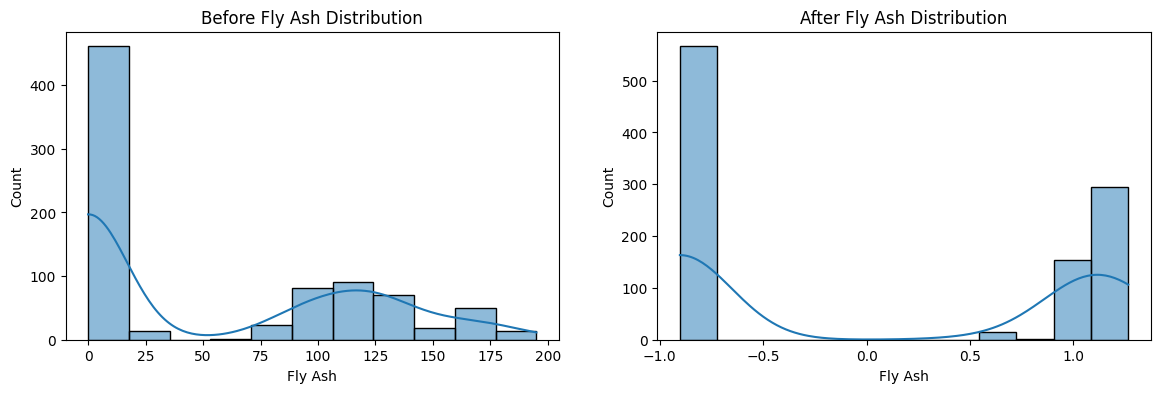

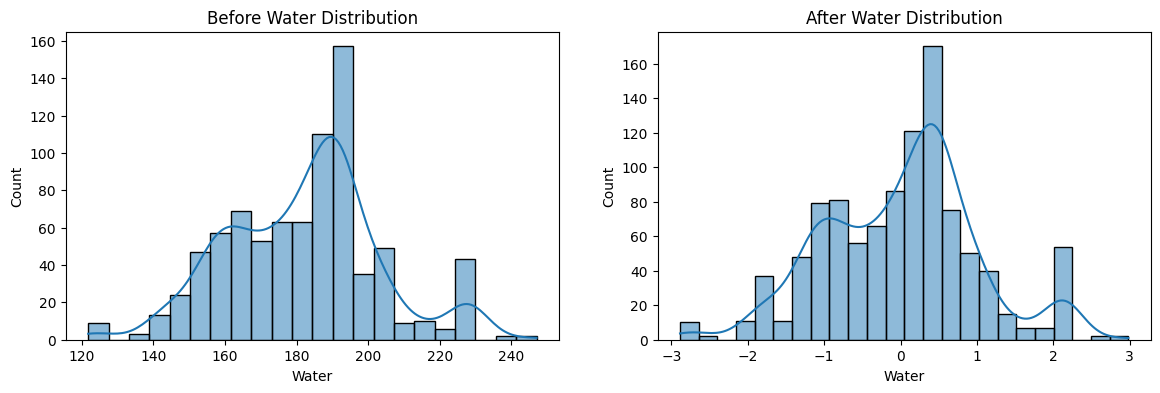

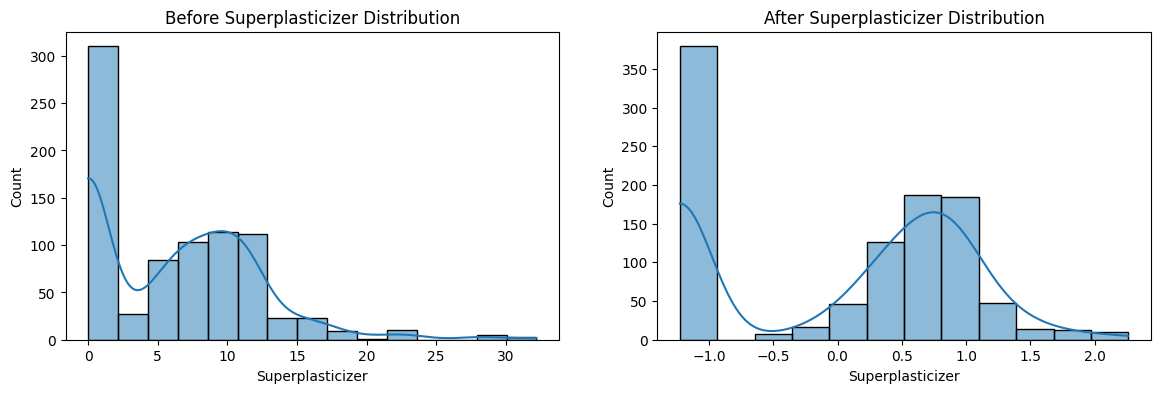

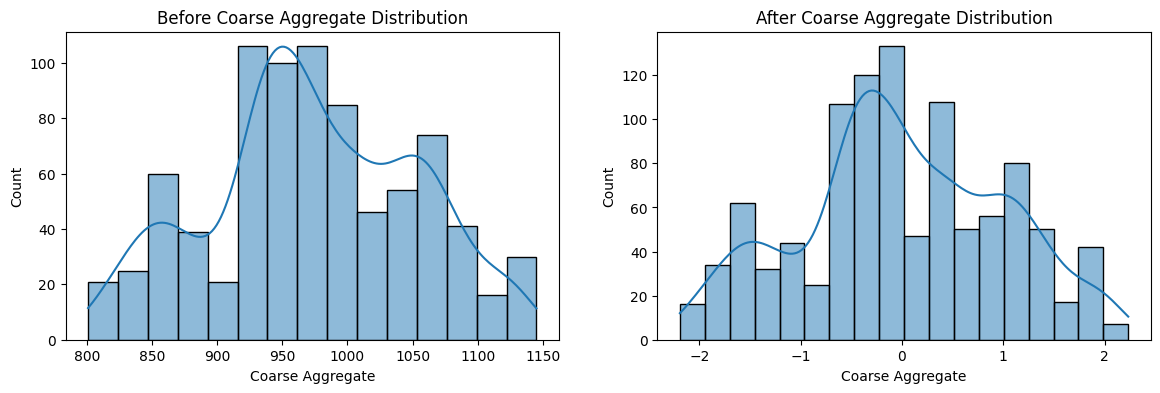

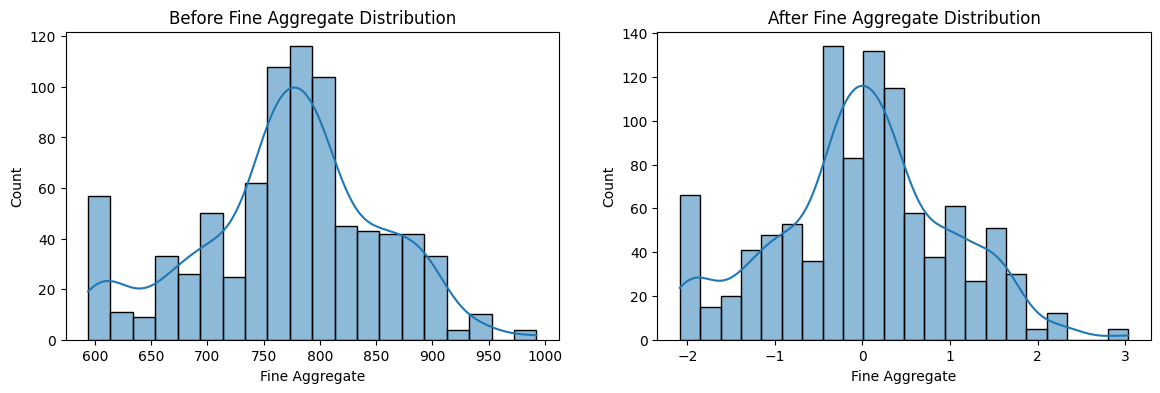

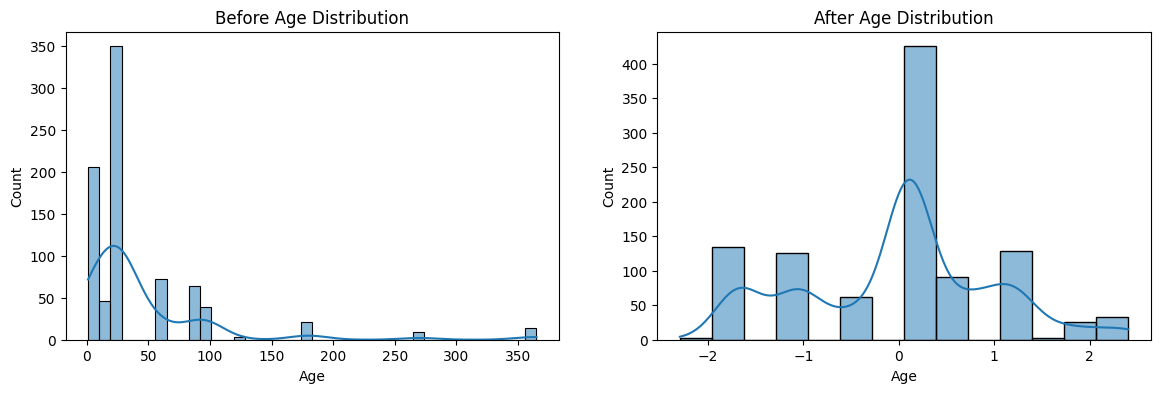

In [20]:
X_transformed2 = pd.DataFrame(X_transformed2, columns=X.columns)

for column in X_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[column], kde=True)
    plt.title(f"Before {column} Distribution")

    plt.subplot(1,2,2)
    sns.histplot(X_transformed2[column], kde=True)
    plt.title(f"After {column} Distribution")

    plt.show()

### Comparison of Lambdas

In [21]:
pd.DataFrame({"cols":X_train.columns, "box_cox_lambda": pt1.lambdas_, "yeo_johnson_lambda": pt2.lambdas_})

,cols,box_cox_lambda,yeo_johnson_lambda
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
